<a href="https://colab.research.google.com/github/Yuito-K/risawa/blob/main/SVM_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVMを用いたIris データセットの分類と可視化

## 環境設定とデータ準備

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# データセットの読み込みと前処理
iris = load_iris()
X, y = iris.data, iris.target

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# データの標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVMモデルの構築と評価

In [55]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel, C=1.0, degree=3, gamma='scale'):
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)
    else:
        svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    return svm

# 異なるカーネルでSVMを訓練・評価
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel)

Kernel: linear, Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Kernel: poly, Accuracy: 0.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.76      1.00      0.87        13
           2       1.00      0.69      0.82        13

    accuracy                           0.89        38
   macro avg       0.92      0.90      0.89        38
weighted avg       0.92      0.89      0.89        38

Kernel: rbf, Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.

## ハイパーパラメータCの影響分析

C: 0.001, Accuracy: 0.32
C: 0.01, Accuracy: 0.32
C: 0.1, Accuracy: 0.87
C: 1, Accuracy: 0.95
C: 10, Accuracy: 0.97
C: 100, Accuracy: 0.95


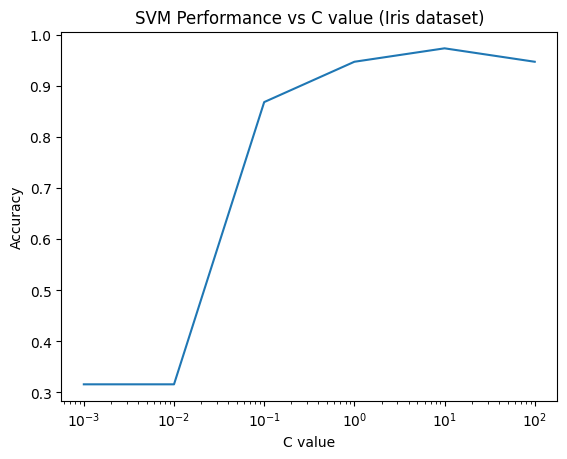

In [56]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"C: {C}, Accuracy: {score:.2f}")
    accuracies.append(score) # この後の可視化のため，正解率をストック

# 一応可視化
plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C value (Iris dataset)')
plt.show()

In [57]:
from sklearn.datasets import fetch_olivetti_faces

# データセット取得
faces = fetch_olivetti_faces(shuffle=True)
X, y = faces.data, faces.target

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# データの前処理（標準化）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# prompt: scikit-learnのSVCクラスを用いて線形SVMを実装

# 線形SVMの実装
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


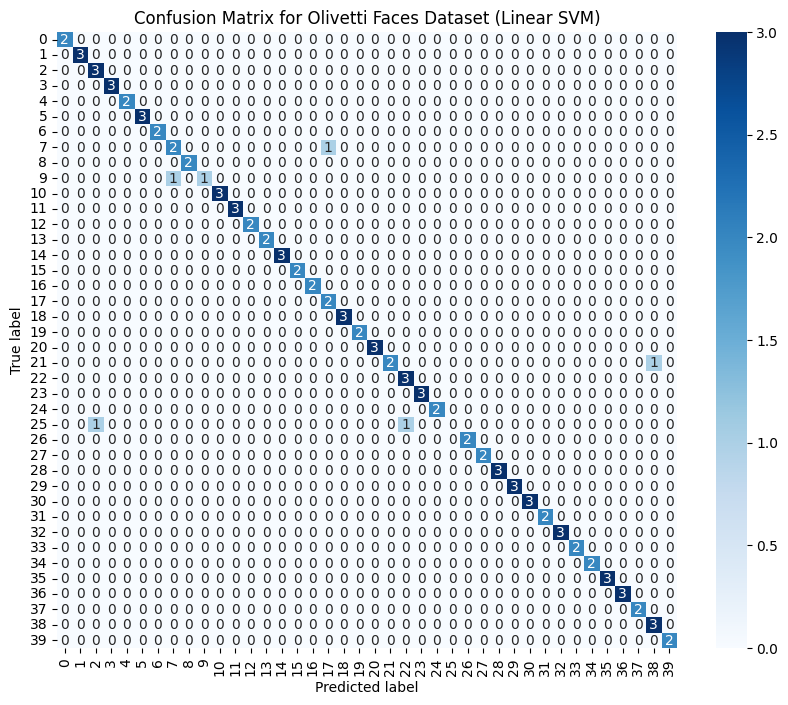

In [60]:
# prompt: 混同行列を作成し，分類性能を可視化

import matplotlib.pyplot as plt
import seaborn as sns

# 混同行列の計算
cm = confusion_matrix(y_test, y_pred_linear)

# 混同行列の可視化
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Olivetti Faces Dataset (Linear SVM)')
plt.show()

RBF SVM Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


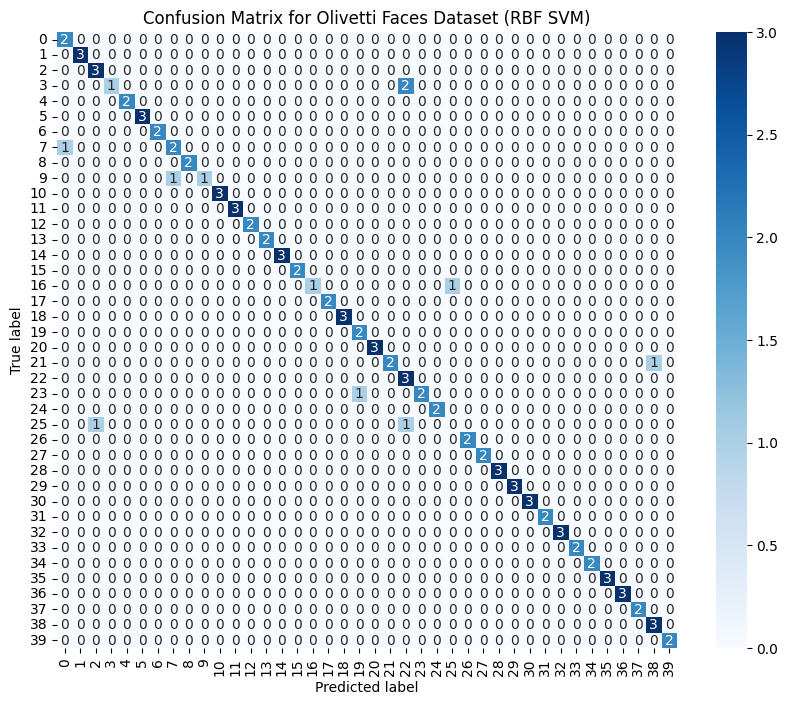

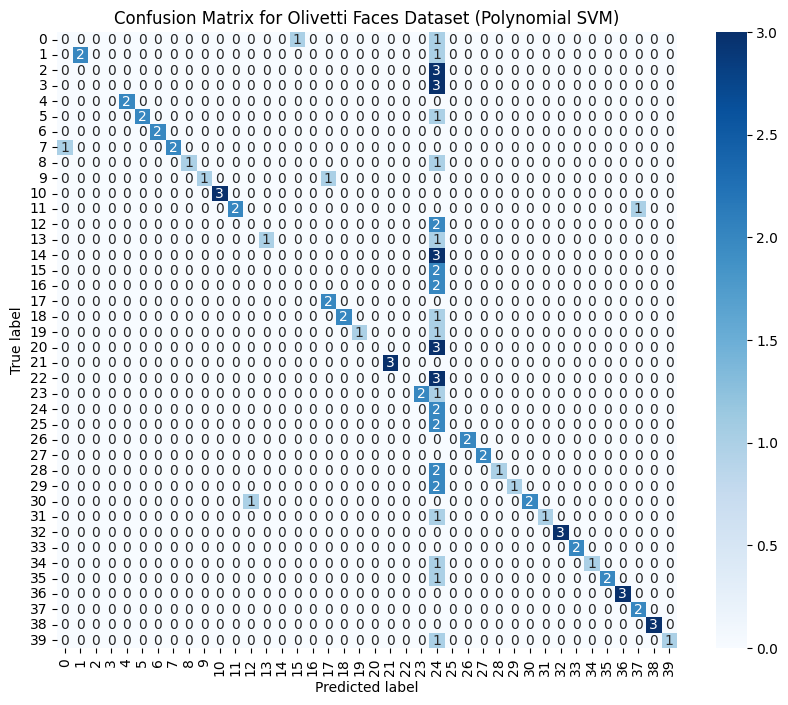

In [61]:
# prompt: 線形カーネル，多項式カーネル，RBFカーネルを使用してSVMを実装します

import matplotlib.pyplot as plt
# RBF SVMの実装
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svm.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")
print(classification_report(y_test, y_pred_rbf))

# 多項式SVMの実装
poly_svm = SVC(kernel='poly', degree=3) # degreeで多項式の次数を指定
poly_svm.fit(X_train_scaled, y_train)
y_pred_poly = poly_svm.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print(f"Polynomial SVM Accuracy: {accuracy_poly:.2f}")
print(classification_report(y_test, y_pred_poly))

# 混同行列の計算 (例: RBF SVM)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# 混同行列の可視化 (例: RBF SVM)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Olivetti Faces Dataset (RBF SVM)')
plt.show()

# 混同行列の計算 (例: 多項式SVM)
cm_poly = confusion_matrix(y_test, y_pred_poly)

# 混同行列の可視化 (例: 多項式SVM)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Olivetti Faces Dataset (Polynomial SVM)')
plt.show()

In [62]:
# 各カーネルの精度の比較
print("--- Kernel Performance Comparison ---")
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")
print(f"Polynomial SVM Accuracy: {accuracy_poly:.2f}")

# 混同行列の比較と考察
print("\n--- Confusion Matrix Analysis ---")
print("Linear SVM Confusion Matrix:")
print(cm)
print("\nRBF SVM Confusion Matrix:")
print(cm_rbf)
print("\nPolynomial SVM Confusion Matrix:")
print(cm_poly)

print("\n--- Discussion ---")
print("Based on the accuracy and confusion matrices:")
print("- Compare the overall accuracy of each kernel.")
print("- Analyze the confusion matrices to identify which classes are misclassified more frequently by each kernel.")
print("- Consider the nature of the Olivetti Faces dataset (image data) and how different kernels might handle its features.")
print("- Discuss potential reasons for the observed differences in performance.")
print("- Suggest further steps, such as hyperparameter tuning for other kernels, to potentially improve performance.")

--- Kernel Performance Comparison ---
Linear SVM Accuracy: 0.95
RBF SVM Accuracy: 0.91
Polynomial SVM Accuracy: 0.56

--- Confusion Matrix Analysis ---
Linear SVM Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]

RBF SVM Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]

Polynomial SVM Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]

--- Discussion ---
Based on the accuracy and confusion matrices:
- Compare the overall accuracy of each kernel.
- Analyze the confusion matrices to identify which classes are misclassified more frequently by each kernel.
- Consider the nature of the Olivetti Faces dataset (image data) and how different kernels might handle its features.
- Discuss potential reasons for the observed differences i

３つを比較したときに線形、RBM、多項式の順で制度が高かった。上位２つは0．9を超えていたためかなり高制度だと言える。混同行列を見たときにラベル24が異様な間違え方をしていたため、精度が下がったと考えられる。他の顔面と違って口ひげがあったのが原因の一端だと考えられる。

In [63]:
# prompt: 正則化パラメータ C の値を [0.1, 10, 100] と変えて，モデルの性能がどのように変化するか分析します。

import matplotlib.pyplot as plt
# Cの値を変更してRBFカーネルの性能を分析
C_values_analysis = [0.1, 10, 100]
accuracies_analysis = []

print("\n--- Analyzing the effect of C on RBF Kernel Performance ---")
for C in C_values_analysis:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"C: {C}, Accuracy: {score:.2f}")
    accuracies_analysis.append(score)

# 結果の分析
print("\n--- Analysis Results ---")
for i, C in enumerate(C_values_analysis):
    print(f"C = {C}: Accuracy = {accuracies_analysis[i]:.2f}")

# 必要に応じて、ここで可視化を追加することもできます
# plt.plot(C_values_analysis, accuracies_analysis)
# plt.xscale('log')
# plt.xlabel('C value')
# plt.ylabel('Accuracy')
# plt.title('SVM Performance vs C value (Olivetti Faces dataset, RBF Kernel)')
# plt.show()


--- Analyzing the effect of C on RBF Kernel Performance ---
C: 0.1, Accuracy: 0.36
C: 10, Accuracy: 0.93
C: 100, Accuracy: 0.93

--- Analysis Results ---
C = 0.1: Accuracy = 0.36
C = 10: Accuracy = 0.93
C = 100: Accuracy = 0.93
